In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

In [17]:
matplotlib.rcParams['figure.figsize'] = [14, 8]

In [9]:
#Load data
Mutation_data = pd.read_csv("../Data/Structure_data/FH_complete_mutation_summary.csv")

In [10]:
# Extract buried and high energy mutations
buried_residues = Mutation_data[Mutation_data["RSA"] <=0.2]
high_energy = Mutation_data[Mutation_data["average_energy"] >= 2.5]

In [12]:
# Convert to sets for the venn diagram
buried_residues_set = set(buried_residues["Mutation"])
high_energy_set = set(high_energy["Mutation"])

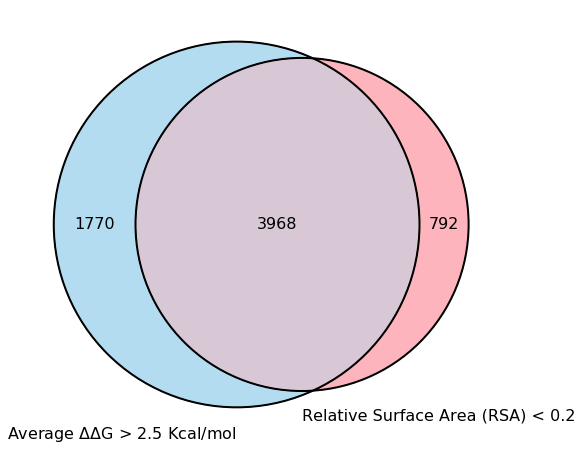

In [30]:
# Do the plotting with the convenient matplotlib_venn
import matplotlib_venn
c = matplotlib_venn.venn2([buried_residues_set, high_energy_set], ("Average $\Delta \Delta$G > 2.5 Kcal/mol", "Relative Surface Area (RSA) < 0.2", "Predicted Destabilizing"))
d =matplotlib_venn.venn2_circles(subsets = (buried_residues_set, high_energy_set), linewidth=2, color="k")

c.get_patch_by_id('10').set_color('#43a9db')
c.get_patch_by_id('01').set_color('#fb4459')

c.get_patch_by_id('11').set_color('#9F779A')


c.get_patch_by_id('10').set_edgecolor('black')
c.get_patch_by_id('01').set_edgecolor('black')
c.get_patch_by_id('11').set_edgecolor('black')

for text in c.set_labels:
    text.set_fontsize(16)
    
for text in c.subset_labels:
    text.set_fontsize(16)
plt.savefig("Figure_4_C_venndestabilizingmutaitons.pdf")